In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import importlib
import gower
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..','scripts')))

# custom scripts
import utils
import preprocessing
importlib.reload(utils)
importlib.reload(preprocessing)



<module 'preprocessing' from '/home/ronin/Dev/notebooks/machinelearningformodeling/unsupervised/project/scripts/preprocessing.py'>

In [2]:
# Load data
df = preprocessing.load_dataset()

<Axes: >

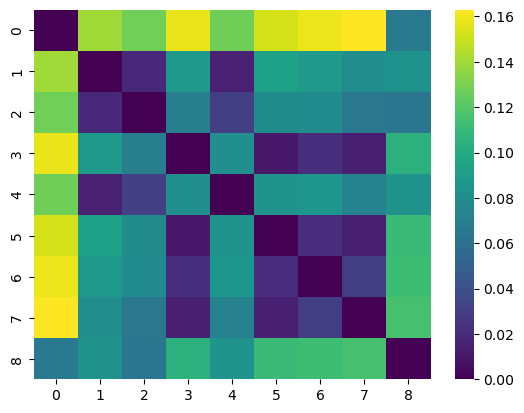

In [3]:
distance_matrix = gower.gower_matrix(df)
sns.heatmap(distance_matrix[:9,:9], cmap='viridis')

For k=4, the number of outliers is 480, the plot is below


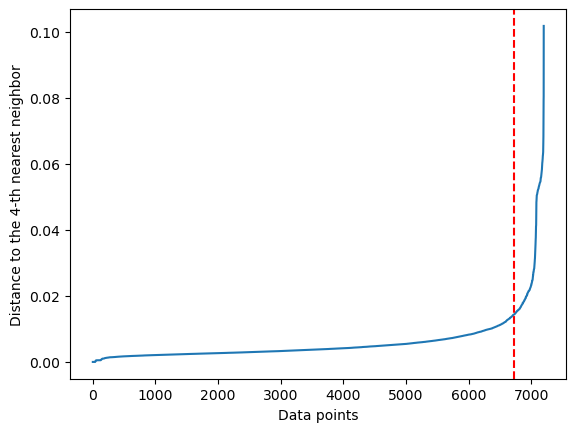

For k=5, the number of outliers is 278, the plot is below


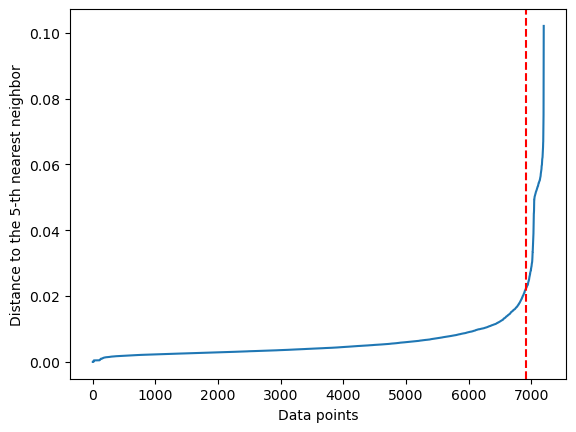

For k=6, the number of outliers is 365, the plot is below


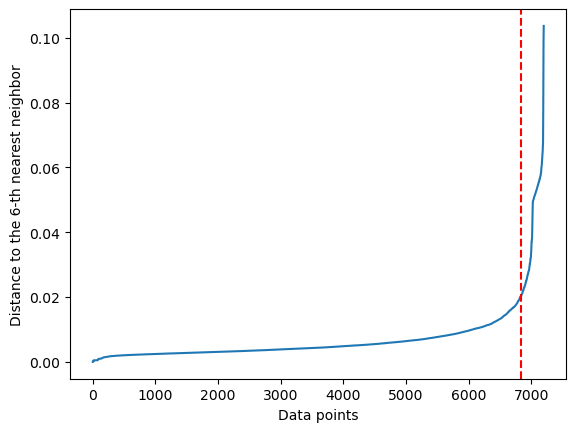

For k=7, the number of outliers is 433, the plot is below


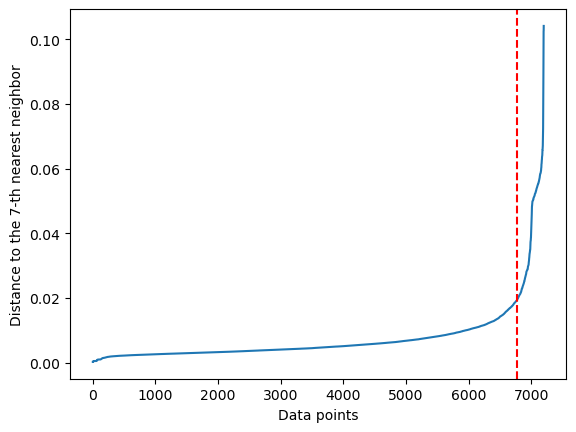

For k=8, the number of outliers is 452, the plot is below


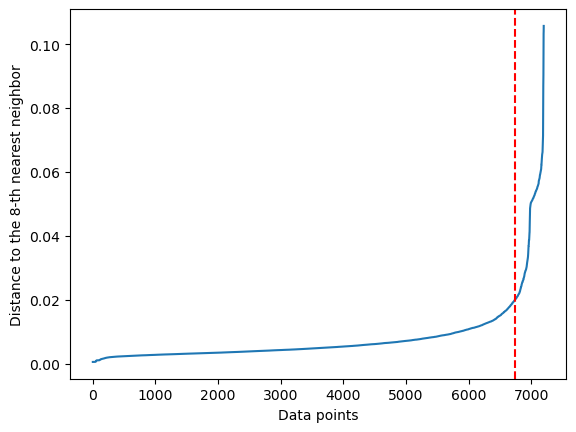

For k=9, the number of outliers is 437, the plot is below


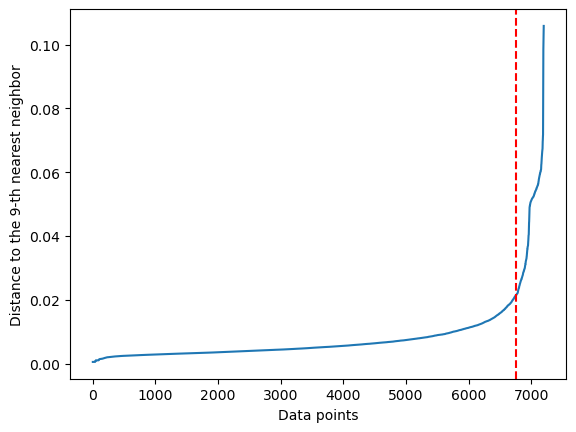

For k=10, the number of outliers is 601, the plot is below


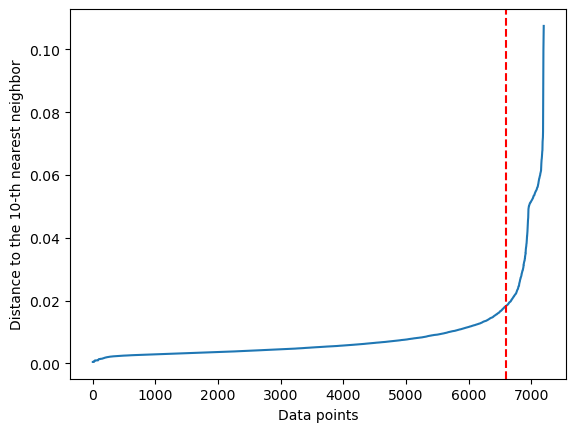

For k=11, the number of outliers is 556, the plot is below


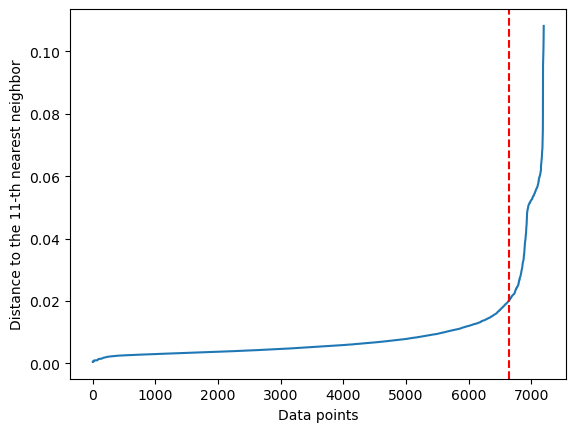

For k=12, the number of outliers is 820, the plot is below


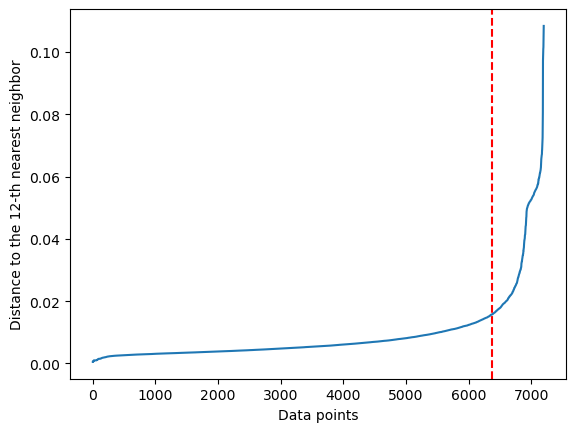

For k=13, the number of outliers is 699, the plot is below


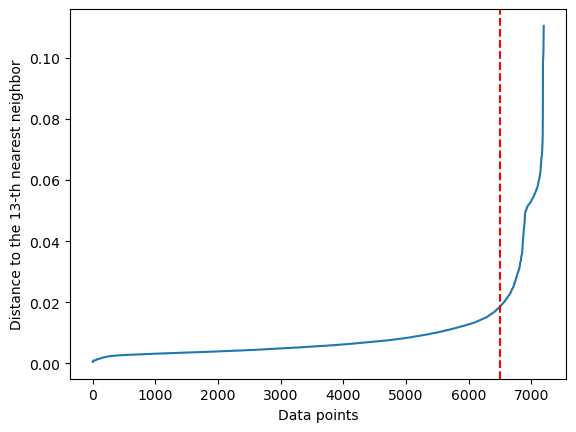

For k=14, the number of outliers is 238, the plot is below


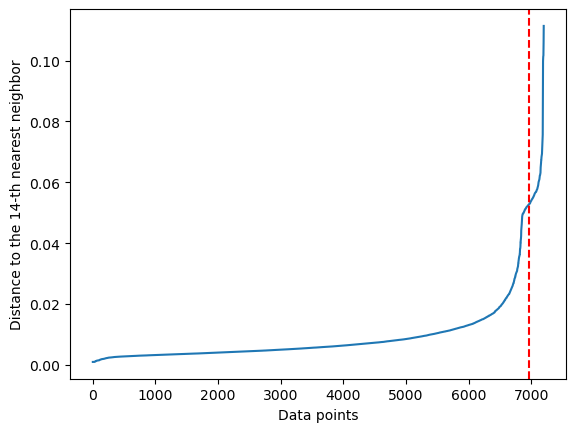

For k=15, the number of outliers is 249, the plot is below


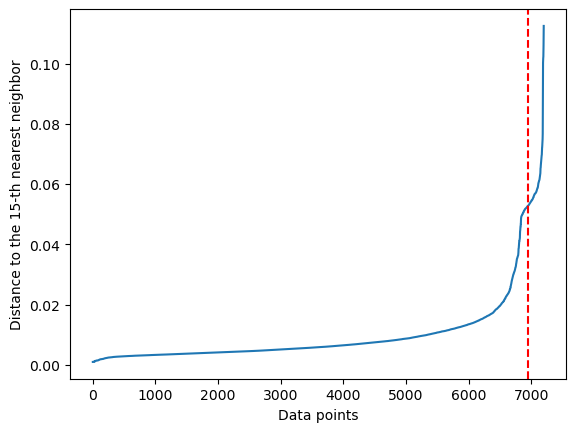

For k=16, the number of outliers is 318, the plot is below


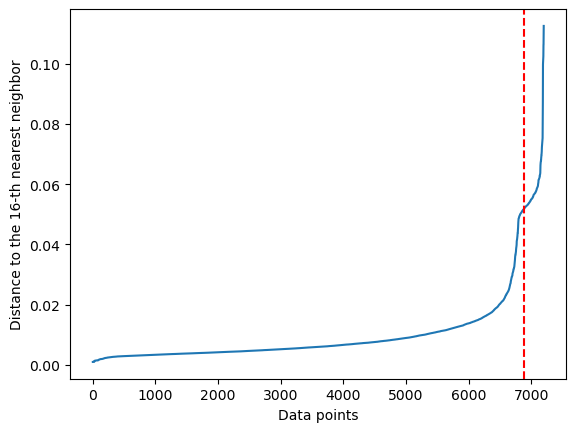

For k=17, the number of outliers is 240, the plot is below


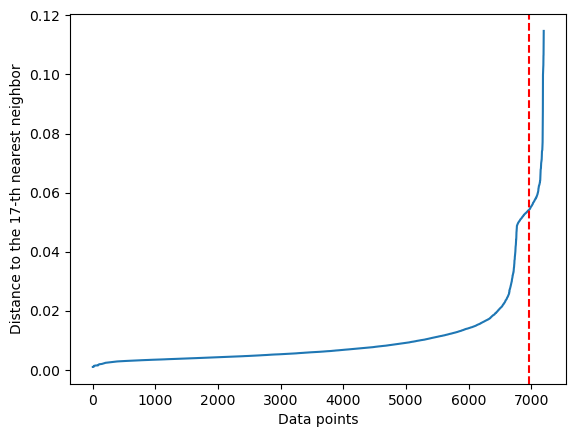

For k=18, the number of outliers is 347, the plot is below


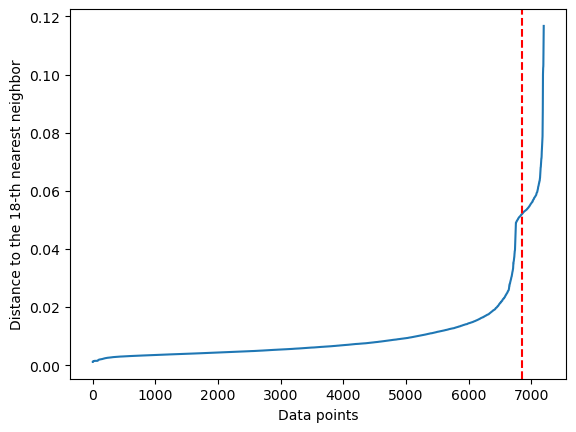

For k=19, the number of outliers is 311, the plot is below


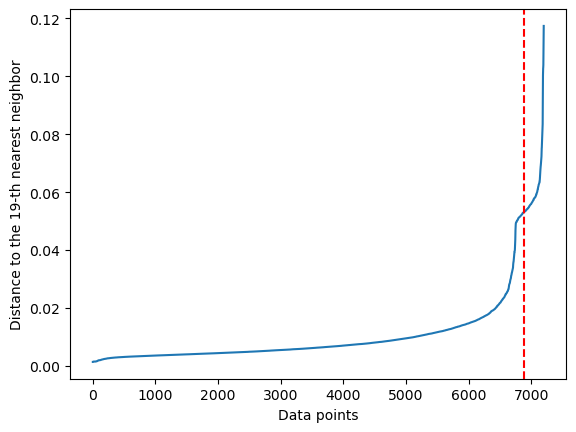

In [4]:
# Initialize a list to store the number of outliers for each k
outliers_count = []

# Gridsearch for k, the loop makes a plot and computes knee for each k
for k in range(4, 20):
    # fit KNN using precomputed distance
    neigh = NearestNeighbors(n_neighbors=k, metric='precomputed')
    neigh.fit(distance_matrix)
    
    # get the distances and indices of the k-th nearest neighbors
    distances, indices = neigh.kneighbors(distance_matrix)
    
    # consider distances to the k-th nearest neighbor and sort them
    distances_kth = distances[:, -1]
    distances_kth_sorted = np.sort(distances_kth)
    
    # get the treshold using a knee based approach
    kl = KneeLocator(np.arange(len(distances_kth_sorted)), 
                     distances_kth_sorted, 
                     S= 3,
                     curve='convex', 
                     direction='increasing')
    
    # label outliers: points with a distance greater than the knee point distance are considered outliers
    labels = (distances_kth > kl.knee_y) * -1
    
    # count the number of outliers
    num_outliers = np.sum(labels == -1)
    outliers_count.append(num_outliers)
    print(f"For k={k}, the number of outliers is {num_outliers}, the plot is below")
    
    plt.plot(distances_kth_sorted)
    plt.xlabel('Data points')
    plt.ylabel(f"Distance to the {k}-th nearest neighbor")
#plt.title(f"Knee method on sorted distances to the {k}-th nearest neighbor")
    plt.axvline(kl.knee, color='red', linestyle='dashed')
    plt.show()

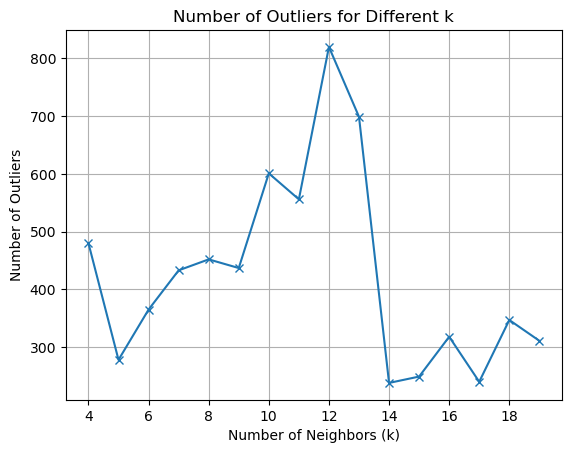

In [6]:
# just for stats
plt.plot(range(4, 20), outliers_count, marker='x')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Number of Outliers')
plt.title('Number of Outliers for Different k')
plt.grid(True)
plt.show()